# Basic UD Part-of-speech Analysis

Fairly basic analysis involving POS tags on some Universal Dependencies corpora

In [1]:
import sys
sys.path.append('../')

from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

import src.corpus

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Parse the corpus

In [2]:
#UD_FILE = "../data/zh_gsd-ud-train.conllu"
#UD_FILE = "../data/en_ewt-ud-train.conllu"
#UD_FILE = "../data/ja_gsd-ud-train.conllu"

BNC_FILE = "../data/bnc/bnc.pkl"

corpus = src.corpus.POSCorpus.create_from_bnc_pickled(data_file_path=BNC_FILE)

## POS counts

In [3]:
pos_counts = defaultdict(int)

for sentence in corpus.sentences:
  for token in sentence:
    pos_tag = token['pos']
    if pos_tag:
      pos_counts[pos_tag] += 1

<BarContainer object of 21 artists>

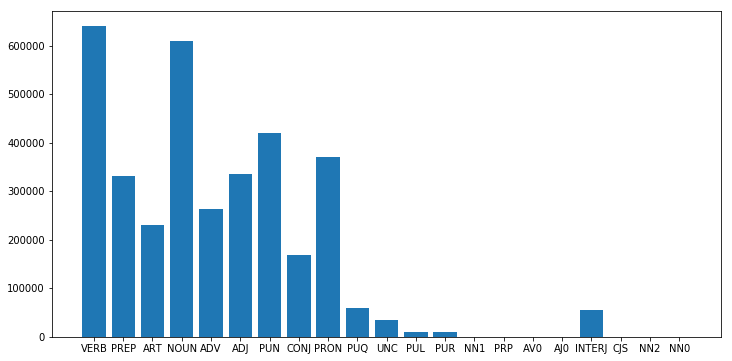

In [4]:
plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values())

In [5]:
lemma_count_df = corpus.get_per_lemma_stats()
lemma_count_df.sort_values('total_count', ascending=False).head(20)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
0,be,0,149382,VERB,149382,0,0.000000,False
29,have,3,52355,VERB,52358,3,0.000057,False
8,do,6,34939,VERB,34945,6,0.000172,False
2166,get,0,16695,VERB,16695,0,0.000000,False
52,say,11,14247,VERB,14258,11,0.000771,False
149,go,294,13947,VERB,14241,294,0.020645,False
118,know,0,12690,VERB,12690,0,0.000000,False
227,will,147,12356,VERB,12503,147,0.011757,False
642,can,35,11523,VERB,11558,35,0.003028,False
521,would,0,10091,VERB,10091,0,0.000000,False


## Distribution of lemmas

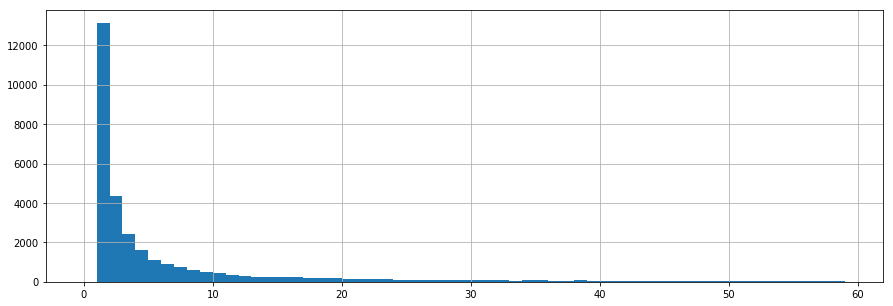

In [6]:
plt.figure(figsize=(15, 5))
lemma_count_df['total_count'].hist(bins=range(0, 60))

## Syntax flexibility metrics

In [7]:
# Only consider lemmas with at least 5 usages
lemma_count_df = lemma_count_df[lemma_count_df['total_count'] >= 5].sort_values('total_count', ascending=False)
noun_lemmas = len(lemma_count_df[lemma_count_df['majority_tag'] == 'NOUN'])
verb_lemmas = len(lemma_count_df[lemma_count_df['majority_tag'] == 'VERB'])
noun_flexibility = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (lemma_count_df['is_flexible'])]) / noun_lemmas
verb_flexibility = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (lemma_count_df['is_flexible'])]) / verb_lemmas

In [8]:
print('Noun Flexibility = P(flexible | noun):', noun_flexibility)

Noun Flexibility = P(flexible | noun): 0.11656829679595278


In [9]:
print('Verb Flexibility = P(flexible | verb):', verb_flexibility)

Verb Flexibility = P(flexible | verb): 0.3565965583173996


In [10]:
# Compute ratio of flexible words that are nouns, to compare with Balteiro (2007)
num_flexible = len(lemma_count_df[lemma_count_df['is_flexible']])
num_flexible_nouns = len(lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & lemma_count_df['is_flexible']])
print("Flexibility Asymmetry = P(noun | flexible):", num_flexible_nouns / num_flexible)

Flexibility Asymmetry = P(noun | flexible): 0.5971922246220303


/scratch/gobi1/wgao/anaconda-pkgs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


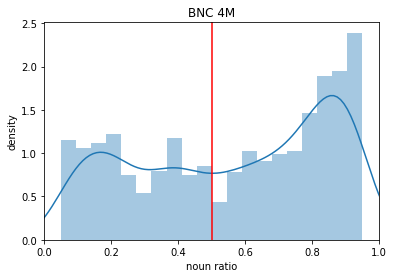

In [11]:
flexible_df = lemma_count_df[lemma_count_df.is_flexible]
dplot = sns.distplot(flexible_df.noun_count / flexible_df.total_count, bins=20)
dplot.set(xlabel='noun ratio', ylabel="density", title='BNC 4M')
dplot.set_xlim((0, 1))
dplot.axvline(x=0.5, color='r')
plt.show()

## Show Examples

In [12]:
# Top flexible nouns
lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
406,work,1668,1603,NOUN,3271,1603,0.490064,True
43,point,1539,485,NOUN,2024,485,0.239625,True
831,place,1664,355,NOUN,2019,355,0.175830,True
730,hand,1881,136,NOUN,2017,136,0.067427,True
2095,sort,1613,216,NOUN,1829,216,0.118097,True
309,change,892,871,NOUN,1763,871,0.494044,True
239,form,1272,358,NOUN,1630,358,0.219632,True
797,face,1269,289,NOUN,1558,289,0.185494,True
2301,head,1437,98,NOUN,1535,98,0.063844,True
2228,end,1181,245,NOUN,1426,245,0.171809,True


In [13]:
# Examples of inflexible nouns
lemma_count_df[(lemma_count_df['majority_tag'] == 'NOUN') & (~lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
335,time,5392,33,NOUN,5425,33,0.006083,False
241,way,3675,0,NOUN,3675,0,0.000000,False
275,thing,3519,0,NOUN,3519,0,0.000000,False
1999,man,3333,9,NOUN,3342,9,0.002693,False
299,people,2803,1,NOUN,2804,1,0.000357,False
918,day,2497,0,NOUN,2497,0,0.000000,False
353,year,2475,0,NOUN,2475,0,0.000000,False
6549,bit,2313,0,NOUN,2313,0,0.000000,False
1402,woman,2121,0,NOUN,2121,0,0.000000,False
522,case,2103,0,NOUN,2103,0,0.000000,False


In [14]:
# Examples of flexible verbs
lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
123,look,717,6009,VERB,6726,717,0.106601,True
433,use,791,2816,VERB,3607,791,0.219296,True
1597,need,591,2362,VERB,2953,591,0.200135,True
502,show,132,1857,VERB,1989,132,0.066365,True
1096,turn,227,1632,VERB,1859,227,0.122109,True
685,call,210,1570,VERB,1780,210,0.117978,True
1025,talk,119,1314,VERB,1433,119,0.083043,True
5767,start,160,1272,VERB,1432,160,0.111732,True
930,move,132,1288,VERB,1420,132,0.092958,True
973,hold,130,1269,VERB,1399,130,0.092924,True


In [15]:
# Examples of inflexible verbs
lemma_count_df[(lemma_count_df['majority_tag'] == 'VERB') & (~lemma_count_df['is_flexible'])].head(10)

,lemma,noun_count,verb_count,majority_tag,total_count,minority_count,minority_ratio,is_flexible
0,be,0,149382,VERB,149382,0,0.000000,False
29,have,3,52355,VERB,52358,3,0.000057,False
8,do,6,34939,VERB,34945,6,0.000172,False
2166,get,0,16695,VERB,16695,0,0.000000,False
52,say,11,14247,VERB,14258,11,0.000771,False
149,go,294,13947,VERB,14241,294,0.020645,False
118,know,0,12690,VERB,12690,0,0.000000,False
227,will,147,12356,VERB,12503,147,0.011757,False
642,can,35,11523,VERB,11558,35,0.003028,False
521,would,0,10091,VERB,10091,0,0.000000,False


## Chi-squared test that nouns and verbs are not equally likely to convert

In [16]:
base_noun_is_base = lemma_count_df[lemma_count_df.majority_tag == 'NOUN'].noun_count.sum()
base_verb_is_base = lemma_count_df[lemma_count_df.majority_tag == 'VERB'].verb_count.sum()
base_noun_not_base = lemma_count_df[lemma_count_df.majority_tag == 'NOUN'].verb_count.sum()
base_verb_not_base = lemma_count_df[lemma_count_df.majority_tag == 'VERB'].noun_count.sum()

In [17]:
print('Instances of base=N, pos=N (no conversion):', base_noun_is_base)
print('Instances of base=N, pos=V (conversion):', base_noun_not_base)
print('Instances of base=V, pos=V (no conversion):', base_verb_is_base)
print('Instances of base=V, pos=N (conversion):', base_verb_not_base)

Instances of base=N, pos=N (no conversion): 557000
Instances of base=N, pos=V (conversion): 27021
Instances of base=V, pos=V (no conversion): 609210
Instances of base=V, pos=N (conversion): 21840


In [18]:
print('Likelihood of noun converting:', base_noun_not_base/base_noun_is_base)
print('Likelihood of verb converting', base_verb_not_base/base_verb_is_base)

Likelihood of noun converting: 0.0485116696588869
Likelihood of verb converting 0.035849706997587036


In [19]:
import scipy.stats
pvalue = scipy.stats.chi2_contingency([[base_noun_is_base, base_noun_not_base], [base_verb_is_base, base_verb_not_base]])[1]
print('p-value from chi-squared test:', pvalue)

p-value from chi-squared test: 3.275637432432949e-234
